In [298]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.simplefilter('ignore')
%matplotlib inline

In [295]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_0339a0ae29134550ace8350770af6180 = 'https://s3.eu-geo.objectstorage.softlayer.net'
else:
    endpoint_0339a0ae29134550ace8350770af6180 = 'https://s3.eu-geo.objectstorage.service.networklayer.com'

client_0339a0ae29134550ace8350770af6180 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='F07flqDLh5kFNaulGaHg9NP2znDsSofzn8FUheQiSVNM',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_0339a0ae29134550ace8350770af6180)

body = client_0339a0ae29134550ace8350770af6180.get_object(Bucket='rprogramming-donotdelete-pr-ehki8hp1vyoh1n',Key='telecom_users.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data= pd.read_csv(body)


In [84]:
data.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [85]:
data.shape

(5986, 22)

# Introduction where you discuss the business problem and who would be interested in this project.

Any business wants to maximize the number of customers. To achieve this goal, it is important not only to try to attract new ones, but also to retain existing ones. Retaining a client will cost the company less than attracting a new one. In addition, a new client may be weakly interested in business services and it will be difficult to work with him, while old clients already have the necessary data on interaction with the service.

Accordingly, predicting the churn, we can react in time and try to keep the client who wants to leave. Based on the data about the services that the client uses, we can make him a special offer, trying to change his decision to leave the operator. This will make the task of retention easier to implement than the task of attracting new users, about which we do not know anything yet.


# Data where you describe the data that will be used to solve the problem and the source of the data.

we are provided with a dataset from a telecommunications company. The data contains information about almost six thousand users, their demographic characteristics, the services they use, the duration of using the operator's services, the method of payment, and the amount of payment.

customerID - customer id <br>
gender - client gender (male / female)<br>
SeniorCitizen - is the client retired (1, 0)<br>
Partner - is the client married (Yes, No)<br>
tenure - how many months a person has been a client of the company<br>
PhoneService - is the telephone service connected (Yes, No)<br>
MultipleLines - are multiple phone lines connected (Yes, No, No phone service)<br>
InternetService - client's Internet service provider (DSL, Fiber optic, No)<br>
OnlineSecurity - is the online security service connected (Yes, No, No internet service)<br>
OnlineBackup - is the online backup service activated (Yes, No, No internet service)<br>
DeviceProtection - does the client have equipment insurance (Yes, No, No internet service)<br>
TechSupport - is the technical support service connected (Yes, No, No internet service)<br>
StreamingTV - is the streaming TV service connected (Yes, No, No internet service)<br>
StreamingMovies - is the streaming cinema service activated (Yes, No, No internet service)<br>
Contract - type of customer contract (Month-to-month, One year, Two year)<br>
PaperlessBilling - whether the client uses paperless billing (Yes, No)<br>
PaymentMethod - payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))<br>
MonthlyCharges - current monthly payment<br>
TotalCharges - the total amount that the client paid for the services for the entire time<br>
Churn - whether there was a churn (Yes or No)<br>

In [86]:
data.columns

Index(['Unnamed: 0', 'customerID', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn'],
      dtype='object')

In [87]:
data.tail()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5981,3772,0684-AOSIH,Male,0,Yes,No,1,Yes,No,Fiber optic,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95,Yes
5982,5191,5982-PSMKW,Female,0,Yes,Yes,23,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.3,No
5983,5226,8044-BGWPI,Male,0,Yes,Yes,12,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05,No
5984,5390,7450-NWRTR,Male,1,No,No,12,Yes,Yes,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15,Yes
5985,860,4795-UXVCJ,Male,0,No,No,26,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),19.80,457.3,No


# Methodology

Since I have an idea about the business problem , I am going to clean my data tranform my data.<br>
secondly I am going to find out the most aspect why users leaves the company, do some statistics testing , <br>visualise my data to have a clear understanding about my data.,<br>
I will explain more about it why I am working on the project

In [88]:
#Lets remove Unamed and CustomerID since it is not useful
data.drop(['Unnamed: 0','customerID'],axis=1,inplace=True)

In [89]:
data.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [90]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


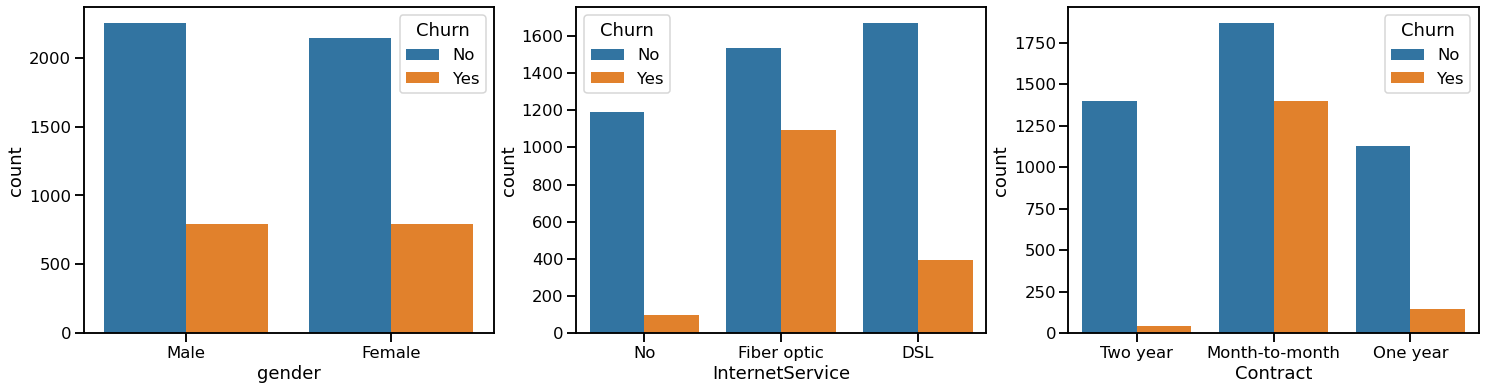

In [91]:
sns.set_context('talk')
plt.figure(figsize=(25,6))
plt.subplot(131)
sns.countplot(x='gender',hue='Churn',data=data)
plt.subplot(132)
sns.countplot(x='InternetService',hue='Churn',data=data)
plt.subplot(133)
sns.countplot(x='Contract',hue='Churn',data=data)
plt.show()

In [92]:
InternetService_cross=pd.crosstab(data.Churn,data.InternetService, margins=True, margins_name="Total")
InternetService_cross
# For the  above result we can say that the gender does not affect much on the Churn , 
#unilke internetService most people who does not have internet service do  ot leave the compagny those who have Fiber Optic 41% of them leave the compagny
#most people also who has month-to-month contract leave the compagny

InternetService,DSL,Fiber optic,No,Total
Churn,,,,
No,1671,1536,1192,4399
Yes,397,1091,99,1587
Total,2068,2627,1291,5986


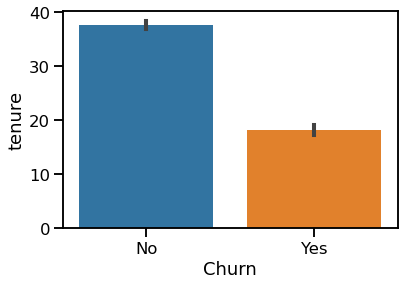

In [93]:
sns.barplot(x='Churn',y='tenure',data=data)

In [94]:
# From here we can say that most people who are below 20 months in the compagny has most chance to leave the compagny
#unlike those people who has more than 20 months remains in the compagny

In [95]:
below_20= data[data['tenure']<=25]
above_20=data[data['tenure']>25]

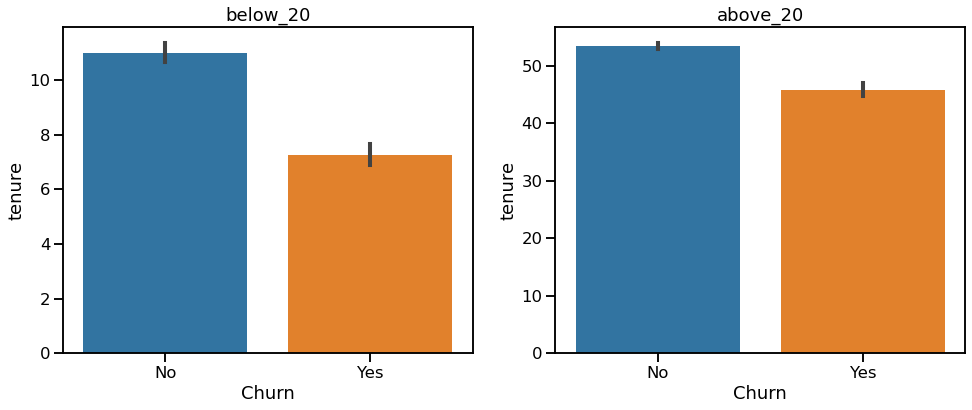

In [96]:
plt.figure(figsize=(25,6))
plt.subplot(132)
sns.barplot(x='Churn',y='tenure',data=below_20)
plt.title('below_20')
plt.subplot(133)
sns.barplot(x='Churn',y='tenure',data=above_20)
plt.title('above_20')
plt.show()

In [97]:
churn_yes=data[data['Churn']=='Yes']
churn_no=data[data['Churn']=='No']

In [396]:
churn_yes

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
11,Female,0,Yes,Yes,30,No,No phone service,DSL,No,No,No,Yes,Yes,Yes,Month-to-month,No,Credit card (automatic),51.20,1561.5,Yes
18,Female,0,Yes,Yes,42,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,94.20,4186.3,Yes
19,Male,0,Yes,No,14,No,No phone service,DSL,No,No,No,No,Yes,Yes,Month-to-month,No,Electronic check,46.35,667.7,Yes
23,Male,0,No,No,32,Yes,No,Fiber optic,No,No,No,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,96.20,3183.4,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5973,Female,1,Yes,No,1,Yes,No,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,76.40,76.4,Yes
5976,Female,0,Yes,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),107.95,5293.2,Yes
5980,Female,0,No,No,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,25.10,25.1,Yes
5981,Male,0,Yes,No,1,Yes,No,Fiber optic,Yes,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95,Yes


In [99]:
churn_no[['InternetService','Churn']].groupby('InternetService').count().reset_index()

,InternetService,Churn
0,DSL,1671
1,Fiber optic,1536
2,No,1192


In [100]:
churn_yes[['InternetService','Churn']].groupby('InternetService').count().reset_index()

,InternetService,Churn
0,DSL,397
1,Fiber optic,1091
2,No,99


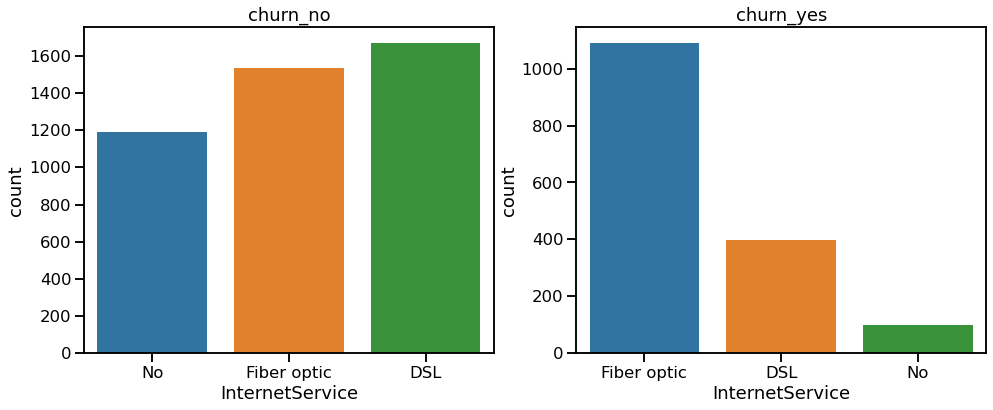

In [101]:
plt.figure(figsize=(25,6))
plt.subplot(132)
sns.countplot(x='InternetService',data=churn_no)
plt.title('churn_no')
plt.subplot(133)
sns.countplot(x='InternetService',data=churn_yes)
plt.title('churn_yes')
plt.show()

Text(0.5, 1.0, 'Churn_yes')

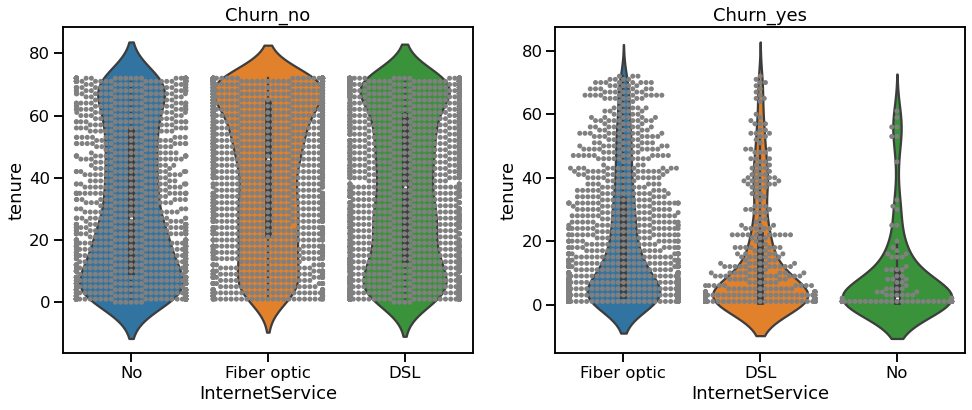

In [102]:
plt.figure(figsize=(25,6))
plt.subplot(132)
sns.violinplot(x='InternetService',y='tenure',data=churn_no)
sns.swarmplot(x='InternetService',y='tenure',data=churn_no,color='gray')
plt.title('Churn_no')
plt.subplot(133)
sns.violinplot(x='InternetService',y='tenure',data=churn_yes)
sns.swarmplot(x='InternetService',y='tenure',data=churn_yes,color='gray')
plt.title('Churn_yes')

In [103]:
# Here we can observe that most people who do not subscribe to the Internet Service stay with the company ,only few of them leave
# unlike Fiber optic  more than 40% leave the compagny , we can say the InternetService (Fiber Optic) as some relation with those people who leave the compagny

In [152]:
#let's do now some statistics testing to find out if there is a relation between the independent and dependant variable
#let's take our H0 : The independent variable and the dependante variable are independant
#let's verify it by doing Chi-square test for all columns
def chi_square(data):
    relationship=[]
    for column in data.columns:
        crosstab = pd.crosstab(data_chi['Churn'],data_chi[column],margins=True,margins_name='Total')
        stat,p_value,dof,expected = stats.chi2_contingency(crosstab)
        if column == 'Churn':
            pass
        if p_value < 0.005 :
            relationship.append('dependent')
        else:
            relationship.append('independent')
    return relationship
related = chi_square(data_chi)

In [153]:
relationship_df=pd.DataFrame(related)

In [156]:
relationship_df.index=data_chi.columns

In [158]:
relationship_df

,0
gender,independent
Partner,dependent
Dependents,dependent
PhoneService,independent
MultipleLines,independent
InternetService,dependent
OnlineSecurity,dependent
OnlineBackup,dependent
DeviceProtection,dependent
TechSupport,dependent


In [136]:
#from here we can conclude that most the entities are related to the dependent variable except gender ,phoneService and MultipleLine

# Let's now create how model

In [300]:
# since most of the data is in the form of categorical variable lets encode it into numerical variable
#lets import all the libraries
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import sklearn.tree as tree
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [162]:
data.drop('PaymentMethod',axis=1,inplace=True)

In [173]:
encode = LabelEncoder()

In [348]:
data.drop(['Unnamed: 0','customerID'],axis=1,inplace=True)

In [373]:
X = data.drop(['Churn'],axis=1)
Y = data['Churn']

In [374]:
for column in X.columns:
    if column in ['MonthlyCharges','tenure','TotalCharges']:
        X[column].replace(' ',0,inplace=True)
        X[column].astype(float)
        pass
    else:
        X[column].astype('category')
        X[column]=encode.fit_transform(X[column])

In [375]:
X.dropna(inplace=True)

In [376]:
X.shape

(5986, 19)

In [377]:
X['TotalCharges']=X['TotalCharges'].astype(float)

In [355]:
# X.drop(['Unnamed: 0','customerID'],axis=1,inplace=True)

In [379]:
X=X.values

In [357]:
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.3,random_state=10)

In [358]:
trees = DecisionTreeClassifier()
trees.fit(xtrain,ytrain)

DecisionTreeClassifier()

[Text(900.3187548014247, 746.4046153846153, 'X[14] <= 0.5\ngini = 0.388\nsamples = 4190\nvalue = [3085, 1105]'),
 Text(584.8363595888817, 717.1338461538461, 'X[8] <= 0.5\ngini = 0.488\nsamples = 2278\nvalue = [1312, 966]'),
 Text(258.2651416565788, 687.8630769230768, 'X[4] <= 6.5\ngini = 0.5\nsamples = 1557\nvalue = [777, 780]'),
 Text(122.91951764596331, 658.5923076923077, 'X[7] <= 0.5\ngini = 0.448\nsamples = 565\nvalue = [191, 374]'),
 Text(76.56847006238942, 629.3215384615385, 'X[17] <= 309.325\ngini = 0.499\nsamples = 248\nvalue = [119, 129]'),
 Text(74.57320048421641, 600.0507692307692, 'X[15] <= 0.5\ngini = 0.497\nsamples = 240\nvalue = [111, 129]'),
 Text(47.637061178880714, 570.78, 'X[16] <= 24.725\ngini = 0.493\nsamples = 107\nvalue = [60, 47]'),
 Text(45.641791600707705, 541.5092307692307, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(49.63233075705373, 541.5092307692307, 'X[2] <= 0.5\ngini = 0.498\nsamples = 101\nvalue = [54, 47]'),
 Text(39.40657416891703, 512.23846153

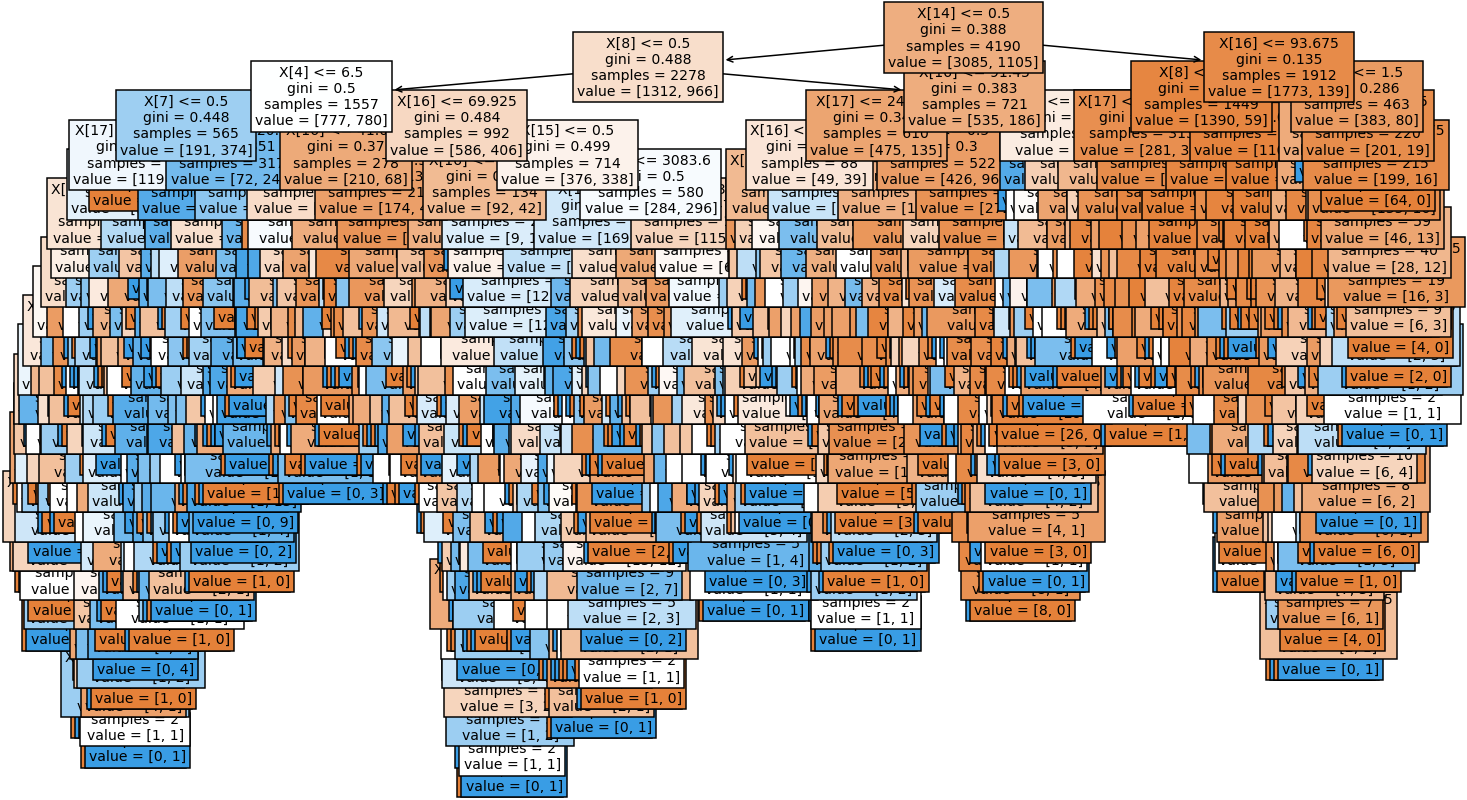

In [299]:
plt.figure(figsize=(24,14))
tree.plot_tree(trees, filled=True, fontsize=14)

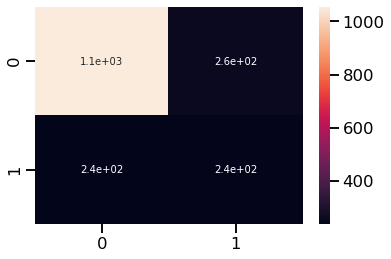

In [359]:
predict= trees.predict(xtest)
sns.heatmap(confusion_matrix(ytest,predict,),annot=True)

In [360]:
print(classification_report(ytest,predict))

              precision    recall  f1-score   support

          No       0.82      0.80      0.81      1314
         Yes       0.48      0.51      0.49       482

    accuracy                           0.72      1796
   macro avg       0.65      0.65      0.65      1796
weighted avg       0.73      0.72      0.72      1796



In [361]:
knn = KNeighborsClassifier(n_neighbors=5,metric='minkowski')
knn.fit(xtrain,ytrain)

KNeighborsClassifier()

In [362]:
predict_knn = knn.predict(xtest)

In [363]:
print(classification_report(ytest,predict_knn))

              precision    recall  f1-score   support

          No       0.82      0.87      0.84      1314
         Yes       0.58      0.48      0.52       482

    accuracy                           0.77      1796
   macro avg       0.70      0.67      0.68      1796
weighted avg       0.75      0.77      0.76      1796



In [378]:
x=X

In [380]:
x.drop(['MultipleLines','gender','PhoneService'],axis=1,inplace=True)

In [381]:
x

,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,1,1,72,2,1,1,1,1,1,1,2,0,1,24.10,1734.65
1,0,0,0,44,1,0,2,2,0,2,0,0,1,1,88.15,3973.20
2,1,1,0,38,1,0,0,0,0,0,0,0,1,0,74.95,2869.85
3,0,0,0,4,0,0,0,0,0,0,2,0,1,2,55.90,238.50
4,0,0,0,2,0,2,0,2,0,0,0,0,0,2,53.45,119.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,0,1,0,1,1,2,0,0,0,2,2,0,1,2,95.00,95.00
5982,0,1,1,23,0,2,2,2,2,2,2,2,1,1,91.10,2198.30
5983,0,1,1,12,2,1,1,1,1,1,1,0,1,2,21.15,306.05
5984,1,0,0,12,1,0,0,2,0,2,2,0,1,2,99.45,1200.15


In [387]:
x_train,x_test,y_train,y_test = train_test_split(x,Y,test_size=0.3,random_state=10)

In [388]:
log=LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [389]:
predict_log=log.predict(x_test)

In [390]:
print('Accuracy: ',accuracy_score(y_test,predict_log))

Accuracy:  0.8056792873051225


In [391]:
print(classification_report(y_test,predict_log))

              precision    recall  f1-score   support

          No       0.85      0.89      0.87      1314
         Yes       0.66      0.57      0.61       482

    accuracy                           0.81      1796
   macro avg       0.75      0.73      0.74      1796
weighted avg       0.80      0.81      0.80      1796



# Conclusion section where you conclude the report.
we can here here that Logistics regression is the algorithm for this model it got 81% of accuracy<br>
As conclusion I can say that we nee to keep our eyes on the customers and review also our internet Servive quality.<br>
all of our entities are involves in the customer's departure <br>
as a new user we need to follow him give him a good quality of our services , because most people who leave 